In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_wine
wine = load_wine()

In [5]:
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)

- Dimesionality reduction

In [6]:
from sklearn.decomposition import PCA
wine_pca = PCA(n_components = 2).fit_transform(wine_std)

df = pd.DataFrame(wine_pca, columns = ['PC1', 'PC2'])
df['target'] = wine.target
df

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0
...,...,...,...
173,-3.370524,-2.216289,2
174,-2.601956,-1.757229,2
175,-2.677839,-2.760899,2
176,-2.387017,-2.297347,2


- 군집화

In [9]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 2021)
km.fit(wine_std)

df['cluster'] = km.labels_
df

,PC1,PC2,target,cluster
0,3.316751,-1.443463,0,0
1,2.209465,0.333393,0,0
2,2.516740,-1.031151,0,0
3,3.757066,-2.756372,0,0
4,1.008908,-0.869831,0,0
...,...,...,...,...
173,-3.370524,-2.216289,2,2
174,-2.601956,-1.757229,2,2
175,-2.677839,-2.760899,2,2
176,-2.387017,-2.297347,2,2


- 시각화

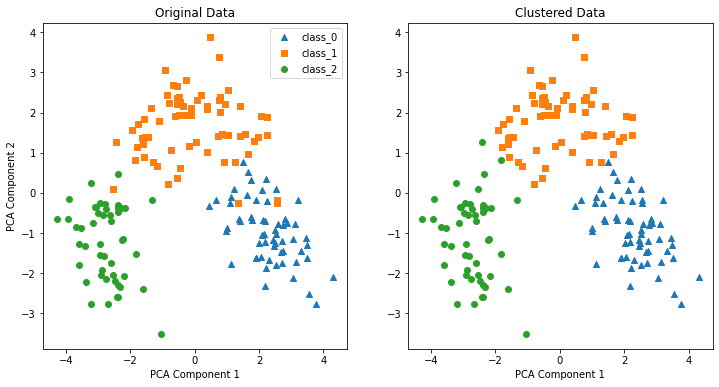

In [10]:
markers = ['^', 's', 'o']
fig, axs = plt.subplots(figsize = (12, 6), ncols = 2, nrows = 1)

for k, column in enumerate(['target','cluster']) :
    ax = axs[k]
    ax.set_xlabel('PCA Component 1')
    
    for i, marker in enumerate(markers) :
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker = marker, label = wine.target_names[i])

    if k == 0 :
        ax.legend()
        ax.set_ylabel('PCA Component 2')
        ax.set_title('Original Data')

    else :
        ax.set_title('Clustered Data')